4. SVM с ядром. Практика

1. Импортируйте датасет load_iris из sklearn.datasets. Датасет состоит из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). 

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах): длина и ширина чашелистика и длина и ширина лепестка. 

In [20]:
import numpy as np
from  sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import LinearSVC, SVC 
import matplotlib.pyplot as plt

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

2. Обычно рекомендуется скалировать данные для обучения SVM.

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. Для того, чтобы сравнить линейный SVM и SVM с ядром RBF и визуально отобразить различия, оставим два класса и первые два признака. 

In [23]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]

y_2d = y[y > 0]
y_2d -= 1

этап 2. Линейный SVM

4. Посмотрим на работу линейного SVM с разными параметрами регуляризации С. Зададим С:

In [24]:
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)

In [25]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [26]:
l_scc = LinearSVC(random_state=42) 

In [27]:
reg_grid = GridSearchCV(l_scc, param_grid=param_grid, cv=cv, scoring='accuracy')


model_grid = reg_grid.fit(X, y)

In [28]:
reg_grid.best_params_

{'C': 1000.0}

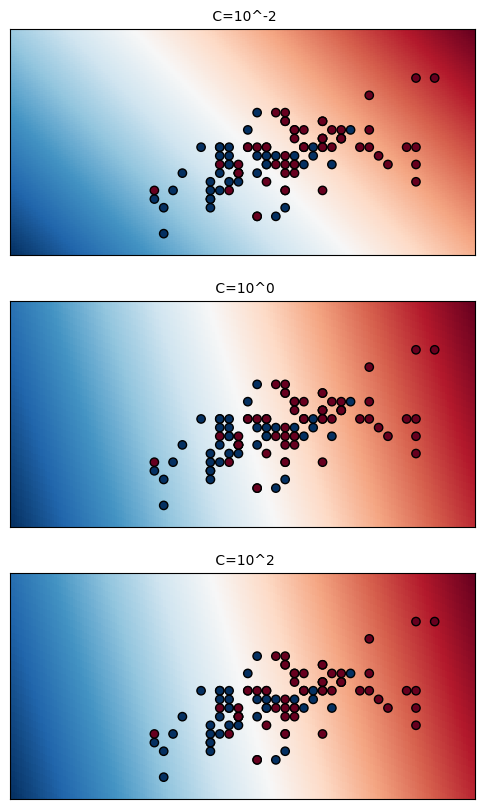

In [29]:
C_2d_range = [1e-2, 1, 1e2]
classifiers = []
for C in C_2d_range:
    clf = LinearSVC(C=C)
    clf.fit(X_2d, y_2d)
    classifiers.append((C, clf))
    
    
plt.figure(figsize=(6, 10))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), 1, k + 1)
    plt.title(" C=10^%d" % (np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

Этап 3. SVM с ядром RBF

8. SVM с ядром радиальной базисной функции можно вызвать, используя SVC из sklearn.svm. SVC — это SVM с ядром, тип которого указывается в параметрах при инициализации SVC. Но если не указывать никакого ядра, RBF идёт по умолчанию. Поэтому вам достаточно вызвать clf = SVC(random_state=42).

Выполните настройку гиперпараметров с теми же параметрами (n_splits=5, test_size=0.2, random_state), но для параметров С, gamma и классификатора SVC.

In [35]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(C=C_range, gamma=gamma_range)

In [36]:
clf = SVC(random_state=42)

In [37]:
reg_grid = GridSearchCV(clf, param_grid=param_grid, cv=cv, scoring='accuracy')


model_grid = reg_grid.fit(X, y)

In [38]:
reg_grid.best_params_

{'C': 1.0, 'gamma': 0.1}

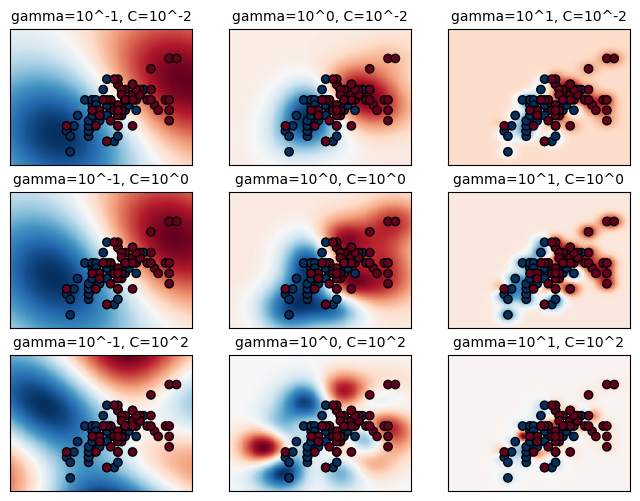

In [39]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# Визуализация
# рисуем визуализацию эффектов параметров

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")